# Multimedia Project --
## Retrieving Frames

In [3]:
from perceptual.filterbank import *
import ffmpeg
import cv2
import numpy as np
import pandas as pd
import colorsys
import matplotlib.pyplot as plt
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix


# determine what OpenCV version we are using
try:
    import cv2.cv as cv
    USE_CV2 = True
    print("yes")
except ImportError:
    # OpenCV 3.x does not have cv2.cv submodule
    USE_CV2 = False
    
import sys
from skimage import color
from skimage import io
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix
from cvtools import VideoReader

In [2]:
def yiq_to_rgb_new(y, i, q):
    r = y + 0.948262*i + 0.624013*q
    g = y - 0.276066*i - 0.639810*q
    b = y - 1.105450*i + 1.729860*q

    return (r, g, b)

(480, 852, 3)
(480, 852, 3)


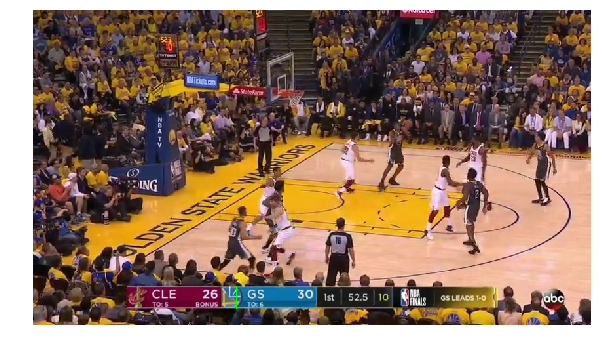

In [102]:
image = cv2.imread('frames/frame1.jpg')
print(np.shape(image))

image_modified = image.copy()
print(np.shape(image_modified))
plt.clf()
cv2.rectangle(image_modified, (160, 420), (285, 455), (0, 0, 255))
cv2.rectangle(image_modified, (310, 420), (430, 455), (0, 255, 0))

ipynb_show_cv2_image(image_modified, figsize=(10, 10))
# plt.savefig("example_1")
plt.show()


### New

In [6]:
def crop_img_to_grey(image_modified):
    cropRedImg = image_modified[424:444,258:284]
    cropBlueImg = image_modified[424:444,400:429]
#     ipynb_show_cv2_image(cropRedImg, figsize=(5, 5)) 
#     ipynb_show_cv2_image(cropBlueImg, figsize=(5, 5)) 
    Img_Red = color.rgb2gray(cropRedImg)
    Img_Blue = color.rgb2gray(cropBlueImg)
    return Img_Red,Img_Blue

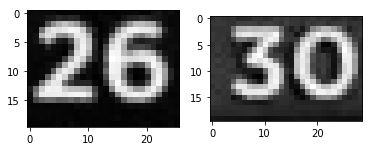

In [7]:
image1 = cv2.imread('frames/frame2.jpg')
red0,blue0 = crop_img_to_grey(image1)
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red0,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue0,cmap='gray')
plt.show()

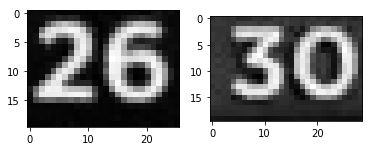

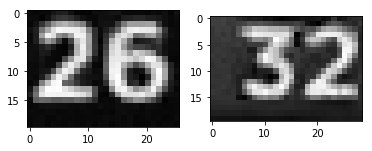

In [10]:
image1 = cv2.imread('frames/frame2.jpg')
image2 = cv2.imread('frames/frame12.jpg')

# red0,blue0 = crop_img_to_grey(image_modified)
red1,blue1 = crop_img_to_grey(image1)
red2,blue2 = crop_img_to_grey(image2)
# plt.figure()
# plt.clf()
# plt.subplot(1, 2, 1)
# plt.imshow(red0,cmap = 'gray')
# plt.subplot(1, 2, 2)
# plt.imshow(blue0,cmap='gray')
# plt.show()

plt.figure()
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red1,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue1,cmap='gray')
plt.show()

plt.figure()
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red2,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue2,cmap='gray')
plt.show()



# red100,blue100 = crop_img(cv2.imread('frames/frame251.jpg'))

In [15]:
#abs test
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
goal = []
prev = 0
curr = 1
print("Absolute subtraction between two consecutive images:")
for i in np.arange(3,40):
    if prev == 0:
        prev = i-1
        curr = i
#     image1 = cv2.imread('frames/frame'+str(prev)+'.jpg')
#     image2 = cv2.imread('frames/frame'+str(curr)+'.jpg')
    image1 = cv2.imread('frames/frame'+str(i-1)+'.jpg')
    image2 = cv2.imread('frames/frame'+str(i)+'.jpg')
    red0,blue0 = crop_img_to_grey(image1)
    red1,blue1 = crop_img_to_grey(image2)
# red2,blue2 = crop_img_to_grey(image2)

#     error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
#     error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
    error_Red01 = np.sum(np.abs(red0-red1))
    error_Blue01 = np.sum(np.abs(blue0-blue1))
    print('Red:%.3f , Blue:%.3f -- image %d - image %d'%(error_Red01,error_Blue01,i,i-1))
    if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
        prev = i
        curr +=1
        goal.append(i)
        
    else:
        curr+=1

print(goal)




Absolute subtraction between two consecutive images:
Red:3.511 , Blue:5.141 -- image 3 - image 2
Red:13.596 , Blue:13.943 -- image 4 - image 3
Red:4.889 , Blue:6.191 -- image 5 - image 4
Red:2.812 , Blue:3.518 -- image 6 - image 5
Red:4.336 , Blue:3.833 -- image 7 - image 6
Red:12.788 , Blue:13.629 -- image 8 - image 7
Red:2.096 , Blue:3.025 -- image 9 - image 8
Red:3.558 , Blue:2.617 -- image 10 - image 9
Red:4.172 , Blue:19.092 -- image 11 - image 10
Red:14.378 , Blue:66.548 -- image 12 - image 11
Red:6.073 , Blue:7.844 -- image 13 - image 12
Red:5.509 , Blue:7.702 -- image 14 - image 13
Red:5.482 , Blue:5.680 -- image 15 - image 14
Red:5.844 , Blue:6.629 -- image 16 - image 15
Red:16.759 , Blue:15.403 -- image 17 - image 16
Red:5.759 , Blue:4.994 -- image 18 - image 17
Red:5.166 , Blue:5.954 -- image 19 - image 18
Red:4.509 , Blue:4.834 -- image 20 - image 19
Red:14.119 , Blue:15.227 -- image 21 - image 20
Red:4.905 , Blue:5.431 -- image 22 - image 21
Red:6.167 , Blue:7.020 -- image

In [ ]:
# #abs test
# # read vedio and process the img at the same time
# # Simple dissimilarity is applied here image-image (pixel by pixel)

# vidFname = 'nba.mp4'

# vidReader = cv2.VideoCapture(vidFname)
# vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
# fps = vidReader.get(cv2.CAP_PROP_FPS)
# print(vidFrames,fps)
# #49485 = 35* 23* 60
# success,image = vidReader.read()
# #(480, 852, 3)

# red0,blue0 = crop_img_to_grey(image)

# # ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# # ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
# images_red = {}
# images_blue = {}
# errors_red = {}
# errors_blue = {}
# highlight = []
# count = 0
# while success:
#     # Extracting every 20 frames

#     for i in range(40):
#         success,image = vidReader.read()
    
#     success,image = vidReader.read()
    
#     #print('Read a new frame: ', success)
#     count += 1
    
#     if success == False:
#         print("break")
#         break
#     red1,blue1 = crop_img_to_grey(image)
    
#     error_Red01 = np.sum(np.abs(red0-red1))
#     error_Blue01 = np.sum(np.abs(blue0-blue1))
# #     if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
#     if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
#         red0 = red1
#         blue0 = blue1
#         count = count*40/fps
#         highlight.append(float(count))
#         images_red[count] = red1
#         images_blue[count] = blue1
#         errors_red[count] = error_Red01
#         errors_blue[count] = error_Blue01
        
# print("done")
# print(len(highlight))
# print(highlight)

In [99]:
#abs test
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

# vidFname = 'nba.mp4'
vidFname = 'G3Q2.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidReader.set(cv2.CAP_PROP_FPS,1)
fps = vidReader.get(cv2.CAP_PROP_FPS)
print(fps)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
print(vidFrames,fps)
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

count = 0
frame_count = 0
print(np.ceil(fps))
while success:
# for i in range(1000):
    # Extracting every 20 frames
    success,image = vidReader.read()
        
    if (frame_count % np.ceil(fps)) == 0:
#         print("%d second"%(i / np.ceil(fps)))
        try:
            red1,blue1 = crop_img_to_grey(image)
        except:
            print(success)
            print(i / np.ceil(fps))
        error_Red01 = np.sum(np.abs(red0-red1))
        error_Blue01 = np.sum(np.abs(blue0-blue1))
#         print(error_Red01,error_Blue01)
#         plt.subplot(1, 2, 1)
#         plt.imshow(red1,cmap = 'gray')
#         plt.subplot(1, 2, 2)
#         plt.imshow(blue1,cmap='gray')
#         plt.show()
        if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
            red0 = red1
            blue0 = blue1
            highlight.append(int(frame_count/np.ceil(fps)))
            images_red[count] = red1
            images_blue[count] = blue1
            errors_red[count] = error_Red01
            errors_blue[count] = error_Blue01
            count+=1
    frame_count+=1
print("done")
print(len(highlight))
print(highlight)

28.999166469565807
46886 28.999166469565807
29.0
done
28
[523, 550, 551, 561, 563, 565, 566, 568, 569, 719, 722, 779, 780, 854, 878, 881, 884, 891, 1142, 1302, 1308, 1386, 1427, 1432, 1525, 1612, 1615, 1616]


523 s


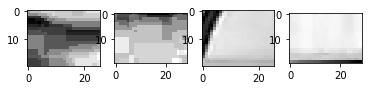

550 s


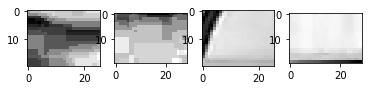

551 s


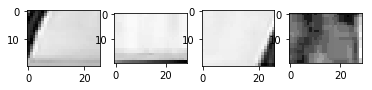

561 s


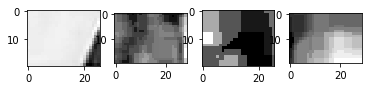

563 s


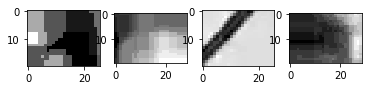

565 s


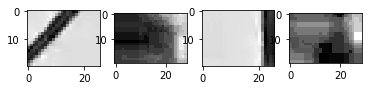

566 s


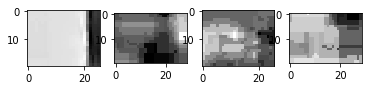

568 s


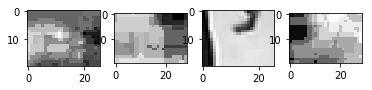

569 s


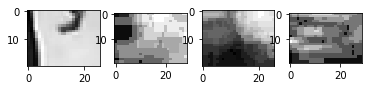

719 s


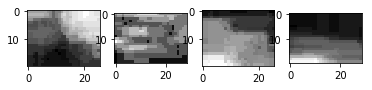

722 s


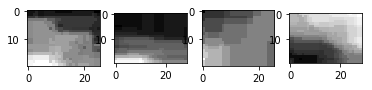

779 s


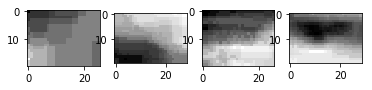

780 s


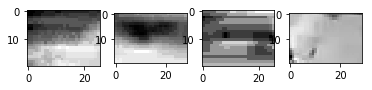

854 s


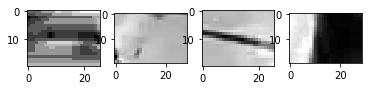

878 s


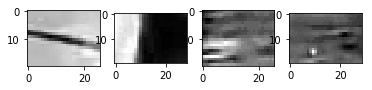

881 s


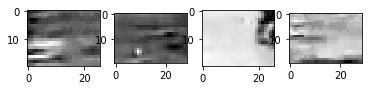

884 s


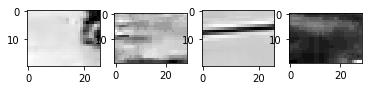

891 s


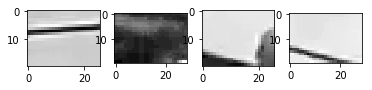

1142 s


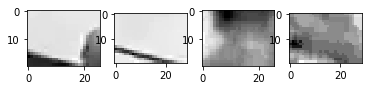

1302 s


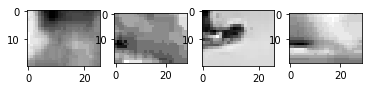

1308 s


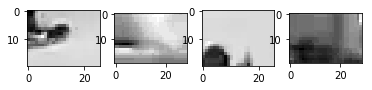

1386 s


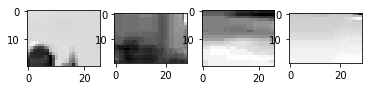

1427 s


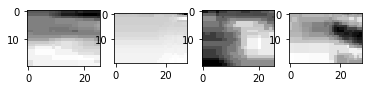

1432 s


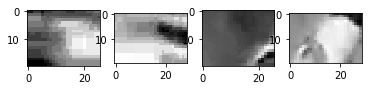

1525 s


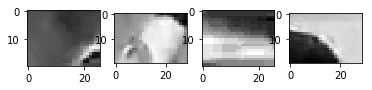

1612 s


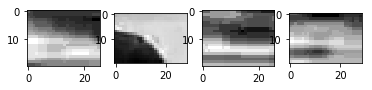

1615 s


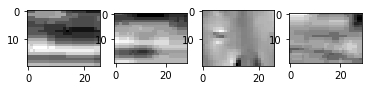

1616 s


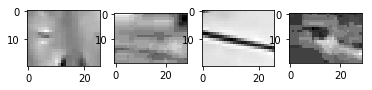

In [100]:
plt.clf()
for i in range(len(highlight)):
    if i ==0:
        print(highlight[i],"s")
        red1 = images_red[i]
        blue1 = images_blue[i]
        red2 = images_red[i+1]
        blue2 = images_blue[i+1]
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()
    else:
        red1 = images_red[i-1]
        blue1 = images_blue[i-1]
        red2 = images_red[i]
        blue2 = images_blue[i]
#         print("second",highlight[i],errors_red[i],errors_blue[i])
        print(highlight[i],"s")
        plt.figure()
        plt.clf()
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()

In [96]:
highlight_1 = highlight.copy()
audio_time = [7, 41, 355.0424489795918, 385.0424489795918, 433.0424489795918, 513.0424489795919, 753.0848979591836, 810.0848979591836, 815.0848979591836, 961.1273469387754, 1104.1273469387754, 1131.1273469387754, 1306.1697959183673, 1432.1697959183673, 1502.2122448979592]
audio_time = (np.round(audio_time).tolist())
highlight_1 = highlight_1 + audio_time
highlight_1 = np.sort(list(map(int, highlight_1))).tolist()
highlight_2 = highlight_1.copy()
print(len(highlight_1))

prev_time = 0
index = 0
while index < len(highlight_2):
    print(index)
    time = highlight_1[index]
    try:
        next_time = highlight_1[index+1]
        if next_time - time < 2:
            highlight_1.remove(next_time)
        else:
            index+=1
    except:
        break
        
print(highlight_1)
print(len(highlight_2),len(highlight_1))
# highlight_2 = highlight_1.copy()

46
0
1
2
2
3
4
5
6
7
8
9
10
10
11
12
13
14
15
16
17
18
18
19
20
20
21
22
23
24
25
26
27
28
29
30
30
31
32
32
33
33
34
35
36
37
38
[7, 9, 21, 41, 257, 313, 355, 360, 385, 433, 437, 513, 562, 659, 674, 712, 753, 755, 787, 810, 814, 961, 987, 1011, 1072, 1104, 1131, 1133, 1254, 1273, 1295, 1306, 1309, 1364, 1416, 1432, 1434, 1499, 1502]
46 39


In [81]:
highlight_1 = highlight.copy()
prev_time = 0
index = 0
for time in highlight:
    if time - prev_time < 2:
        highlight_1.remove(time)
    prev_time = time    
        

print(len(highlight),len(highlight_1))
highlight_2 = highlight_1.copy()

31 25


In [46]:
# file_list = []
# name_file = 'file '
# with open('files.txt','w') as f:
#     for idx,time in enumerate(highlight_2):
#         if idx != len(highlight_1)-1:
#             if time+10 > highlight_1[idx+1]:
#                 start = str(time-10)
#                 end = str(time+13)
#                 highlight_1.remove(highlight_1[idx+1])
        
        


In [97]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
file_list = []
name_file = 'file '
name_ = ' video/cut'
skip = False
with open('files.txt','w') as f:
    for idx,time in enumerate(highlight_1):
        if not skip:
            file_name = name_file+"'video/cut"+str(idx)+".mp4'\n"
            f.write(str(file_name))
            if idx != len(highlight_1)-1 :
                if time+13 > highlight_1[idx+1]:
                    start = str(time-10)
                    end = str(time+13)
                    skip = True
                else:
                    start = str(time-10)
                    end = str(time+3)
            else:
                start = str(time-10)
                end = str(time+3)
        #     start = str(time-10)
        #     end = str(time+3)
            file_name = name_+str(idx)+'.mp4'
            command = "ffmpeg -ss "+start+" -to " + end + " -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1 "+ file_name
            print(command)
            os.system(command)
        else:
            skip = False

        



ffmpeg -ss -3 -to 20 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut0.mp4
ffmpeg -ss 11 -to 24 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut2.mp4
ffmpeg -ss 31 -to 44 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut3.mp4
ffmpeg -ss 247 -to 260 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut4.mp4
ffmpeg -ss 303 -to 316 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut5.mp4
ffmpeg -ss 345 -to 368 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut6.mp4
ffmpeg -ss 375 -to 388 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut8.mp4
ffmpeg -ss 423 -to 446 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut9.mp4
ffmpeg -ss 503 -to 516 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut11.mp4
ffmpeg -ss 552 -to 565 -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1  video/cut12.mp4
ffmpeg -ss 649 -to 662 -

In [98]:
# ffmpeg -f concat -i textfile -c copy -fflags +genpts merged.mp4
# command_concat = 'cat video/cut0.mp4 video/cut1.mp4 > video/movie3.mp4'
command_concat = "ffmpeg -f concat -i files.txt -map 0 -fflags +genpts -c copy video/movie3.mp4"

# command_concat = "ffmpeg -ss "+start+" -to " + end + " -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1 video/movie3.mp4"
os.system(command_concat)

0

# G3Q2

In [108]:
command = "ffmpeg -ss  6 -to 1615 -accurate_seek -i G3Q2_1.mp4 -codec copy -avoid_negative_ts 1 G3Q2_2.mp4"
print(command)
os.system(command)

ffmpeg -ss  6 -to 1615 -accurate_seek -i G3Q2_1.mp4 -codec copy -avoid_negative_ts 1 G3Q2_2.mp4


0

28.999166469565807
46886 28.999166469565807


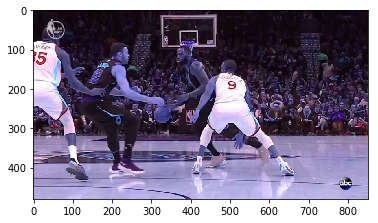

In [104]:
vidFname = 'G3Q2.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidReader.set(cv2.CAP_PROP_FPS,1)
fps = vidReader.get(cv2.CAP_PROP_FPS)
print(fps)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
print(vidFrames,fps)
#49485 = 35* 23* 60
success,image = vidReader.read()
plt.clf()
plt.imshow(image)
plt.show()

In [109]:
#abs test
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

# vidFname = 'nba.mp4'
vidFname = 'G3Q2.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidReader.set(cv2.CAP_PROP_FPS,1)
fps = vidReader.get(cv2.CAP_PROP_FPS)
print(fps)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
print(vidFrames,fps)
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

count = 0
frame_count = 0
print(np.ceil(fps))
while success:
# for i in range(1000):
    # Extracting every 20 frames
    success,image = vidReader.read()
        
    if (frame_count % np.ceil(fps)) == 0:
#         print("%d second"%(i / np.ceil(fps)))
        try:
            red1,blue1 = crop_img_to_grey(image)
        except:
            print(success)
            print(i / np.ceil(fps))
        error_Red01 = np.sum(np.abs(red0-red1))
        error_Blue01 = np.sum(np.abs(blue0-blue1))
#         print(error_Red01,error_Blue01)
#         plt.subplot(1, 2, 1)
#         plt.imshow(red1,cmap = 'gray')
#         plt.subplot(1, 2, 2)
#         plt.imshow(blue1,cmap='gray')
#         plt.show()
        if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
            red0 = red1
            blue0 = blue1
            highlight.append(int(frame_count/np.ceil(fps)))
            images_red[count] = red1
            images_blue[count] = blue1
            errors_red[count] = error_Red01
            errors_blue[count] = error_Blue01
            count+=1
    frame_count+=1
print("done")
print(len(highlight))
print(highlight)

28.99999148682158
46573 28.99999148682158
29.0
done
35
[15, 16, 56, 57, 78, 86, 112, 113, 138, 139, 233, 234, 406, 438, 444, 631, 648, 664, 665, 801, 814, 815, 833, 948, 1075, 1076, 1138, 1139, 1243, 1263, 1312, 1332, 1460, 1527, 1582]


15 s


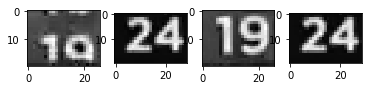

16 s


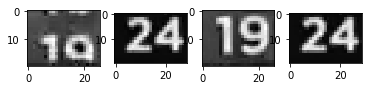

56 s


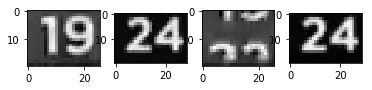

57 s


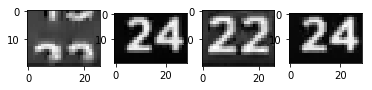

78 s


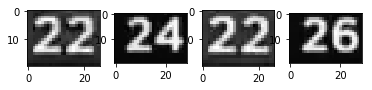

86 s


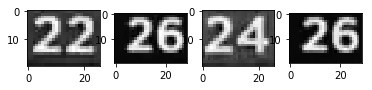

112 s


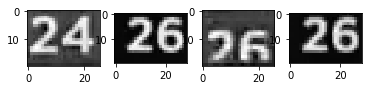

113 s


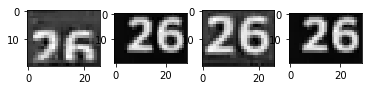

138 s


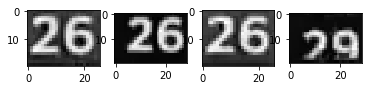

139 s


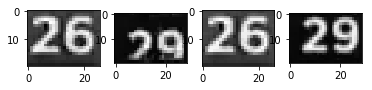

233 s


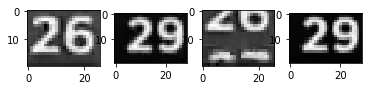

234 s


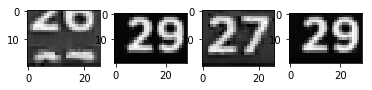

406 s


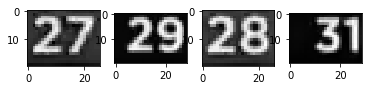

438 s


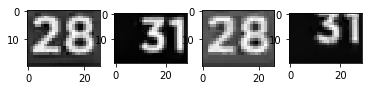

444 s


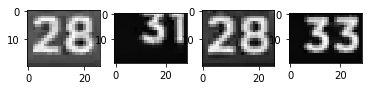

631 s


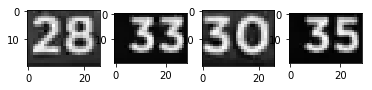

648 s


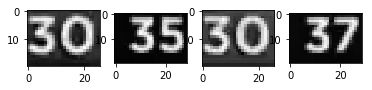

664 s


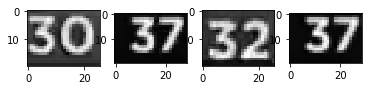

665 s


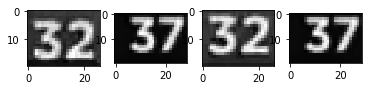

801 s


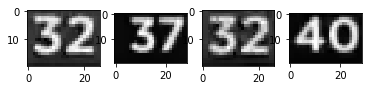

814 s


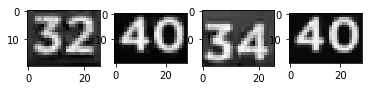

815 s


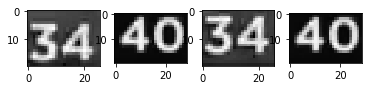

833 s


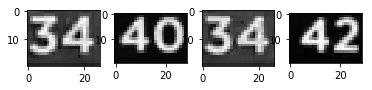

948 s


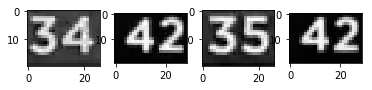

1075 s


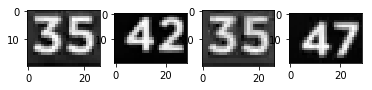

1076 s


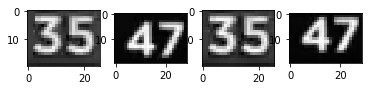

1138 s


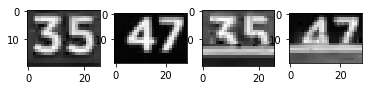

1139 s


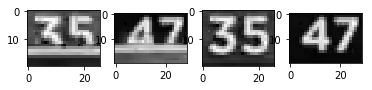

1243 s


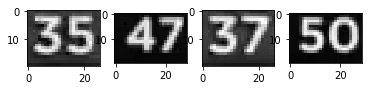

1263 s


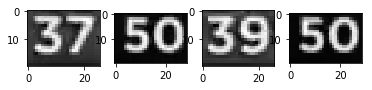

1312 s


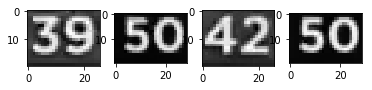

1332 s


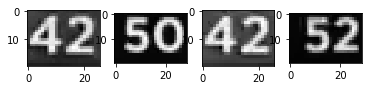

1460 s


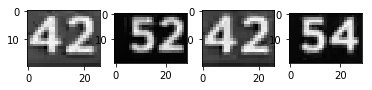

1527 s


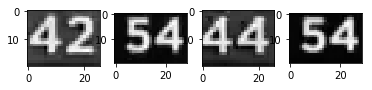

1582 s


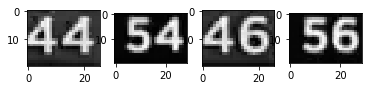

In [110]:
plt.clf()
for i in range(len(highlight)):
    if i ==0:
        print(highlight[i],"s")
        red1 = images_red[i]
        blue1 = images_blue[i]
        red2 = images_red[i+1]
        blue2 = images_blue[i+1]
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()
    else:
        red1 = images_red[i-1]
        blue1 = images_blue[i-1]
        red2 = images_red[i]
        blue2 = images_blue[i]
#         print("second",highlight[i],errors_red[i],errors_blue[i])
        print(highlight[i],"s")
        plt.figure()
        plt.clf()
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()

In [121]:
highlight_1 = highlight.copy()
audio_time = [84, 145, 159, 217, 266, 403.0424489795918, 438.0424489795918, 655.0848979591836, 707.0848979591836, 797.0848979591836, 808.0848979591836, 1081.1273469387754, 1127.1273469387754, 1189.1273469387754, 1338.1697959183673, 1444.1697959183673, 1588.2122448979592]
audio_time = (np.round(audio_time).tolist())
highlight_1 = highlight_1 + audio_time
highlight_1 = np.sort(list(map(int, highlight_1))).tolist()
highlight_2 = highlight_1.copy()
print(len(highlight_1))

prev_time = 0
index = 0
while index < len(highlight_2):
    print(index)
    time = highlight_1[index]
    try:
        next_time = highlight_1[index+1]
        if next_time - time < 2:
            highlight_1.remove(next_time)
        else:
            index+=1
    except:
        break
        
print(highlight_1)
print(len(highlight_2),len(highlight_1))
# highlight_2 = highlight_1.copy()

52
0
0
1
1
2
3
4
5
5
6
6
7
8
9
10
10
11
12
13
14
14
15
16
17
18
19
19
20
21
22
23
24
24
25
26
27
27
28
29
30
30
31
32
33
34
35
36
37
38
39
40
41
[15, 56, 78, 84, 86, 112, 138, 145, 159, 217, 233, 266, 403, 406, 438, 444, 631, 648, 655, 664, 707, 797, 801, 808, 814, 833, 948, 1075, 1081, 1127, 1138, 1189, 1243, 1263, 1312, 1332, 1338, 1444, 1460, 1527, 1582, 1588]
52 42


In [126]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
file_list = []
name_file = 'file '
name_ = ' video2/cut'
skip = False
time_save_= 0
with open('files_G3Q2.txt','w') as f:
    for idx,time in enumerate(highlight_1):
        if not skip:
            file_name = name_file+"'video2/cut"+str(idx)+".mp4'\n"
            f.write(str(file_name))
            if idx != len(highlight_1)-1 :
                if time+13 > highlight_1[idx+1]:
                    start = str(time-10)
                    end = str(time+13)
                    time_save_= time+13
                    skip = True
                else:
                    start = str(time-10)
                    end = str(time+3)
            else:
                start = str(time-10)
                end = str(time+3)
        #     start = str(time-10)
        #     end = str(time+3)
            file_name = name_+str(idx)+'.mp4'
            command = "ffmpeg -ss "+start+" -to " + end + " -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1 "+ file_name
            print(command)
            os.system(command)
        else:
            if time_save_ > time-10:
                start = str(time_save_)
                end = str(time_save_+13)
                time_save_= time_save_+14
                skip = True
                file_name = name_file+"'video2/cut"+str(idx)+".mp4'\n"
                f.write(str(file_name))
                file_name = name_+str(idx)+'.mp4'
                command = "ffmpeg -ss "+start+" -to " + end + " -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1 "+ file_name
                print(command)
                os.system(command)
            else:
                skip = False

        




ffmpeg -ss 5 -to 18 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut0.mp4
ffmpeg -ss 46 -to 59 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut1.mp4
ffmpeg -ss 68 -to 91 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut2.mp4
ffmpeg -ss 91 -to 104 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut3.mp4
ffmpeg -ss 105 -to 118 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut4.mp4
ffmpeg -ss 119 -to 132 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut5.mp4
ffmpeg -ss 133 -to 146 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut6.mp4
ffmpeg -ss 147 -to 160 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut7.mp4
ffmpeg -ss 161 -to 174 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut8.mp4
ffmpeg -ss 223 -to 236 -accurate_seek -i G3Q2.mp4 -codec copy -avoid_negative_ts 1  video2/cut10.mp4
ffmpeg 

In [127]:
# ffmpeg -f concat -i textfile -c copy -fflags +genpts merged.mp4
# command_concat = 'cat video/cut0.mp4 video/cut1.mp4 > video/movie3.mp4'
command_concat = "ffmpeg -f concat -i files_G3Q2.txt -map 0 -fflags +genpts -c copy video2/movieQ3Q2.mp4"

# command_concat = "ffmpeg -ss "+start+" -to " + end + " -accurate_seek -i nba.mp4 -codec copy -avoid_negative_ts 1 video/movie3.mp4"
os.system(command_concat)

0

In [246]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
name_ = ' video2/cut'
for idx,time in enumerate(highlight_1):
    start = str(time-10)
    end = str(time+3)
    file_name = name_+str(idx)+'.mp4'
    command = "ffmpeg -i nba.mp4 -ss "+start+" -c copy -to "+end+ file_name
#     command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss "+start+" -segment_time 13 -to "+end+" -segment_list video"+str(idx)+".ffcat -reset_timestamps 1 -v error chunk-%04d.mp4"
    print(command)
    os.system(command)







ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 14

In [249]:
# command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss 50 -segment_time 13 -to 63 -segment_list video.ffcat -reset_timestamps 1 -v error chunk-%03d.mp4"
# command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss 20 -segment_time 13 -to 33 -segment_list video.ffcat -reset_timestamps 1 -v error chunk-%04d.mp4"
os.system(command_concat_2)
# ffmpeg -y -v error -i Test.ffcat -map 0 -c copy output.avi

0

In [ ]:
for i in np.arange(0,len(highlight)):
    if i ==0:
        continue
    red1 = images_red[highlight[i-1]]
    blue1 = images_blue[highlight[i-1]]
    red2 = images_red[highlight[i]]
    blue2 = images_blue[highlight[i]]
    print(highlight[i],errors_red[highlight[i]],errors_blue[highlight[i]])
    plt.figure()
    plt.clf()
    plt.subplot(1, 4, 1)
    plt.imshow(red1,cmap = 'gray')
    plt.subplot(1, 4, 2)
    plt.imshow(blue1,cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(red2,cmap = 'gray')
    plt.subplot(1, 4, 4)
    plt.imshow(blue2,cmap='gray')
    plt.show()

In [ ]:
import os

h=str(70)
h_i = str(230)
command = "ffmpeg -i nba.mp4 -ss "+h+" -c copy -to "+h_i+" cut.mp4"
os.system(command)
# command


In [ ]:
highlight2 = [23 ,30 ,35 ,40]

In [ ]:
#euclidian
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
goal = []
prev = 0
curr = 1
for i in np.arange(3,40):
    if prev == 0:
        prev = i-1
        curr = i
    image1 = cv2.imread('frames/frame'+str(prev)+'.jpg')
    image2 = cv2.imread('frames/frame'+str(curr)+'.jpg')
#     print('i:%d'%i)
    red0,blue0 = crop_img_to_grey(image1)
    red1,blue1 = crop_img_to_grey(image2)
# red2,blue2 = crop_img_to_grey(image2)

    error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
    error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
    print('error in grayscale: Red:%.3f , Blue:%.3f'%(error_Red01,error_Blue01))
    if (error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
        prev = i
        curr +=1
        goal.append(i)
        
    else:
        curr+=1

print(goal)



In [ ]:
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

vidFname = 'nba.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []
count = 0
while success:
    # Extracting every 20 frames

    for i in range(35):
        success,image = vidReader.read()
    
    success,image = vidReader.read()
    
    #print('Read a new frame: ', success)
    count += 1
    
    if success == False:
        print("break")
        break
    red1,blue1 = crop_img_to_grey(image)
    
    error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
    error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
#     if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
    if ( (3< error_Red01 < 10) or (3<  error_Blue01 < 10) ) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
        red0 = red1
        blue0 = blue1
        highlight.append(count)
        images_red[count] = red1
        images_blue[count] = blue1
        errors_red[count] = error_Red01
        errors_blue[count] = error_Blue01
        
print("done")
print(len(highlight))
print(highlight)

In [ ]:
for i in np.arange(1,len(highlight)):
    red1 = images_red[highlight[i]]
    blue1 = images_blue[highlight[i]]
    red2 = images_red[highlight[i+1]]
    blue2 = images_blue[highlight[i+1]]
    print(errors_red[highlight[i]],errors_blue[highlight[i]])
    plt.figure()
    plt.clf()
    plt.subplot(1, 4, 1)
    plt.imshow(red1,cmap = 'gray')
    plt.subplot(1, 4, 2)
    plt.imshow(blue1,cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(red2,cmap = 'gray')
    plt.subplot(1, 4, 4)
    plt.imshow(blue2,cmap='gray')
    plt.show()

In [ ]:
vidFname = 'nba.mp4'
video_reader = VideoReader()
video_reader.open(vidFname)

# Read a number of video frames (say, the first 10 seconds).
video_fps = video_reader.get_frame_rate()
print(video_fps)
sampling_period = int(1 * video_fps)  # One every 3 seconds.
print(video_duration)
stop_at = int(video_duration * video_fps)  # For the first 10 seconds.
plt.clf()
%matplotlib inline


#(480, 852, 3)
vidReader = VideoCapture(vidFname)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

for frame in video_reader.get_frames():
    index = video_reader.get_current_frame_index()
    if 0 != index % int(sampling_period*1.3):
        continue
    
    red1,blue1 = crop_img_to_grey(frame)

    error_Red01 = np.sum(np.abs(red0-red1))
    error_Blue01 = np.sum(np.abs(blue0-blue1))
#    if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
    if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
        
        red0 = red1
        blue0 = blue1
        count = index/video_fps
        #print(video_fps)
        print(index,count)
        ipynb_show_cv2_image(frame, 'frame %d' % count)
        highlight.append(count)
        images_red[count] = red1
        images_blue[count] = blue1
        errors_red[count] = error_Red01
        errors_blue[count] = error_Blue01
    
    if index > stop_at:
        break

    
print("done")
print(len(highlight))
print(highlight)


In [ ]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist

channel_index=0

error = np.abs(
        red0[:,:,channel_index] - red1[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        red0[:,:,channel_index] - red2[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        red100[:,:,channel_index] - red0[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

######@# blue
print("blue:")
error = np.abs(
        blue0[:,:,channel_index] - blue1[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        blue0[:,:,channel_index] - blue2[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        blue100[:,:,channel_index] - blue0[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)

